# What drives the price of a car?
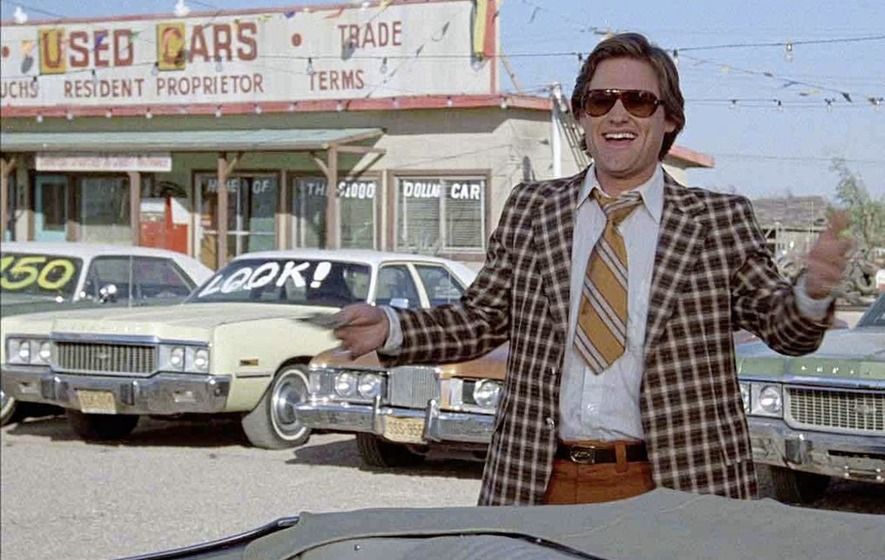

#OVERVIEW

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars. Your goal is to understand what factors make a car more or less expensive. As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.


#CRISP-DM Framework

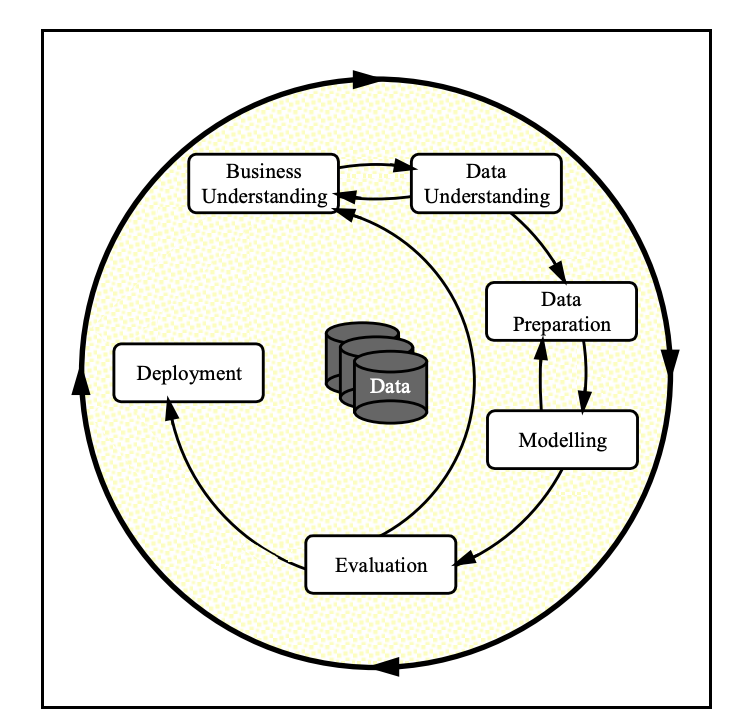

To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM. This process provides a framework for working through a data problem. Your first step in this application will be to read through a brief overview of CRISP-DM here. After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [46]:
# Uploading liblaries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

#Liblaries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Liblaries for models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor

#Liblaries for cross validation and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [119]:
df=pd.read_csv('/content/drive/MyDrive/practical_application_II_starter (2)/data/vehicles.csv')

In [120]:
df.head(10).transpose()

0             1             2                       3  \
id            7222695916    7218891961    7221797935              7222270760   
region          prescott  fayetteville  florida keys  worcester / central MA   
price               6000         11900         21000                    1500   
year                 NaN           NaN           NaN                     NaN   
manufacturer         NaN           NaN           NaN                     NaN   
model                NaN           NaN           NaN                     NaN   
condition            NaN           NaN           NaN                     NaN   
cylinders            NaN           NaN           NaN                     NaN   
fuel                 NaN           NaN           NaN                     NaN   
odometer             NaN           NaN           NaN                     NaN   
title_status         NaN           NaN           NaN                     NaN   
transmission         NaN           NaN           NaN                     NaN   
VIN                  NaN           NaN           NaN                     NaN   
drive                NaN           NaN           NaN                     NaN   
size                 NaN           NaN           NaN                     NaN   
type                 NaN           NaN           NaN                     NaN   
paint_color          NaN           NaN           NaN                     NaN   
state                 az            ar            fl                      ma   

                       4              5              6              7  \
id            7210384030     7222379453     7221952215     7220195662   
region        greensboro  hudson valley  hudson valley  hudson valley   
price               4900           1600           1000          15995   
year                 NaN            NaN            NaN            NaN   
manufacturer         NaN            NaN            NaN            NaN   
model                NaN            NaN            NaN            NaN   
condition            NaN            NaN            NaN            NaN   
cylinders            NaN            NaN            NaN            NaN   
fuel                 NaN            NaN            NaN            NaN   
odometer             NaN            NaN            NaN            NaN   
title_status         NaN            NaN            NaN            NaN   
transmission         NaN            NaN            NaN            NaN   
VIN                  NaN            NaN            NaN            NaN   
drive                NaN            NaN            NaN            NaN   
size                 NaN            NaN            NaN            NaN   
type                 NaN            NaN            NaN            NaN   
paint_color          NaN            NaN            NaN            NaN   
state                 nc             ny             ny             ny   

                            8           9  
id                 7209064557  7219485069  
region        medford-ashland        erie  
price                    5000        3000  
year                      NaN         NaN  
manufacturer              NaN         NaN  
model                     NaN         NaN  
condition                 NaN         NaN  
cylinders                 NaN         NaN  
fuel                      NaN         NaN  
odometer                  NaN         NaN  
title_status              NaN         NaN  
transmission              NaN         NaN  
VIN                       NaN         NaN  
drive                     NaN         NaN  
size                      NaN         NaN  
type                      NaN         NaN  
paint_color               NaN         NaN  
state                      or          pa

In [121]:
df.tail(5)

id   region  price    year manufacturer  \
426875  7301591192  wyoming  23590  2019.0       nissan   
426876  7301591187  wyoming  30590  2020.0        volvo   
426877  7301591147  wyoming  34990  2020.0     cadillac   
426878  7301591140  wyoming  28990  2018.0        lexus   
426879  7301591129  wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

# Data Cleaning

Let's remove un-necessary columns, identify missing & null values, filling missing values and remove outliers

In [123]:
df.shape

(426880, 18)

In [124]:
df.duplicated().value_counts()

False    426880
dtype: int64

In [125]:
# droping columns that are irrelavant to linear model 
#df1 = df.drop(['id'], axis=1)

In [126]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [127]:
df= df.drop(columns=['id', 'VIN'], axis=1)

In [56]:
list(df)

['region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [128]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

null  percent
size          30636100   71.767
cylinders     17767800   41.622
condition     17410400   40.785
drive         13056700   30.586
paint_color   13020300   30.501
type           9285800   21.753
manufacturer   1764600    4.134
title_status    824200    1.931
model           527700    1.236
odometer        440000    1.031
fuel            301300    0.706
transmission    255600    0.599
year            120500    0.282
region               0    0.000
price                0    0.000
state                0    0.000

In [129]:
df1=df

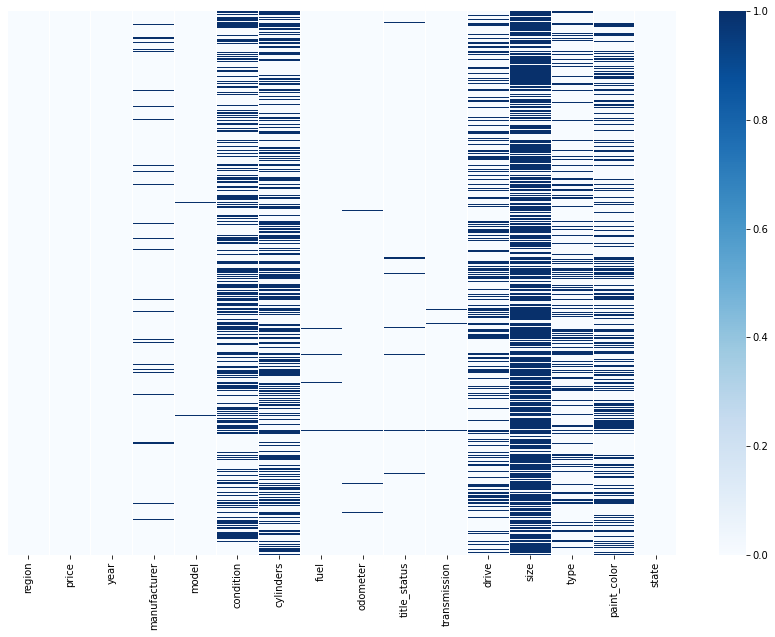

In [130]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.isna(),yticklabels=False,cbar=True, cmap='Blues')
#sns.heatmap(df2.isna(), yticklabels=False, cbar=True, cmap='Accent')
plt.show()

###Let's analyse and eliminate the outlier from the price column 

In [131]:
# Let's analyse and eliminate the outlier from the price column 
df1[df1.price == 0].shape

(32895, 16)

In [132]:
df1[df1.price > 100000].shape

(655, 16)

In [133]:
df1[df1.price < 750].shape

(44778, 16)

In [134]:
df1=df1[(df1.price < 100000) & (df1.price >= 750 )]
df1.shape

(381405, 16)

###Odometers higher than 300k and lower than 10, and models earlier than 1985 may not be good observations for a robust prediction:

In [135]:
df1[df1.odometer < 1000].shape

(7433, 16)

In [136]:
df1[df1.odometer < 1000].sample(20)

region  price    year manufacturer  \
284973             new hampshire  33990  2020.0        mazda   
62127                SF bay area  18998  2000.0         ford   
299024      dayton / springfield  43368  2021.0         ford   
375449                   houston   1200  2005.0    chevrolet   
293262                 cleveland   1250  2013.0    chevrolet   
269997             hudson valley   2799  2005.0      mercury   
342288              rhode island   5995  2013.0   volkswagen   
9076          flagstaff / sedona  52595  2020.0    chevrolet   
92693              daytona beach  71245  2020.0       toyota   
424065                 milwaukee   2900  2007.0       nissan   
8133                   fairbanks  36999  2021.0    chevrolet   
348287      greenville / upstate  33973  2015.0    chevrolet   
108494        sarasota-bradenton  66900  2021.0        honda   
388567                   vermont  50345  2021.0       nissan   
356978                   memphis   5700  2012.0         ford   
404634  kennewick-pasco-richland  27999  2021.0   mitsubishi   
341743              rhode island  12495  2014.0      hyundai   
342819              rhode island  10495  2016.0    chevrolet   
85051                   hartford  28590  2017.0    chevrolet   
423721                 milwaukee   2100  2007.0       nissan   

                         model  condition    cylinders    fuel  odometer  \
284973     mx-5 miata rf grand       good          NaN     gas     507.0   
62127                    f-250  excellent          NaN  diesel       1.0   
299024           edge titanium  excellent          NaN     gas       3.0   
375449                  impala       fair  6 cylinders     gas       1.0   
293262                   sonic        NaN          NaN     gas     153.0   
269997                 montego        NaN          NaN     gas     198.0   
342288                  passat   like new          NaN     gas     187.0   
9076        silverado 1500 rst       good  8 cylinders     gas     212.0   
92693            sienna xle ny  excellent  6 cylinders     gas       2.0   
424065                  armada        NaN          NaN     gas       1.0   
8133                  colorado        NaN  6 cylinders     gas     622.0   
348287               tahoe ltz        NaN          NaN     gas       1.0   
108494             odyssey exl  excellent  6 cylinders     gas      13.0   
388567                   titan        new  8 cylinders     gas      50.0   
356978                  fusion   like new  4 cylinders     gas     176.0   
404634     outlander sport 2.0        NaN  4 cylinders     gas       9.0   
341743      santa fe sport awd  excellent  4 cylinders     gas      99.0   
342819           cruze limited  excellent  4 cylinders     gas      89.0   
85051   silverado 1500 regular       good  6 cylinders     gas     102.0   
423721                  altima        NaN          NaN     gas       1.0   

       title_status transmission drive       size         type paint_color  \
284973        clean        other   rwd        NaN  convertible         red   
62127         clean    automatic   NaN        NaN          NaN         NaN   
299024        clean    automatic   NaN        NaN          SUV        grey   
375449        clean    automatic   fwd    compact        sedan       white   
293262        clean    automatic   NaN        NaN          NaN         NaN   
269997        clean    automatic   NaN        NaN          NaN         NaN   
342288        clean    automatic   NaN        NaN          NaN         NaN   
9076          clean    automatic   NaN        NaN       pickup         NaN   
92693           NaN    automatic   NaN        NaN          van         NaN   
424065        clean    automatic   4wd        NaN        wagon         NaN   
8133          clean    automatic   4wd        NaN        truck         red   
348287        clean    automatic   NaN        NaN          NaN         NaN   
108494          NaN    automatic   NaN        NaN          van        

In [137]:
df1[df1.odometer >300000].shape

(2662, 16)

In [138]:
df1=df1[(df1.odometer < 300000) & (df1.odometer > 1000)]
df1=df1[df1.year>1985]
df1.shape

(359414, 16)

In [139]:
df1=df1[(df1.odometer < 300000) & (df1.odometer > 1000)]
df1=df1[df1.year>1985]
df1.shape

(359414, 16)

Next, let's fill missing values carefuly.

###Dealing with missing 'condition' values

In [140]:
df1['condition'].isnull().sum()

135423

In [141]:
df1.loc[(df1['year'] >= 2017)]['condition'].isnull().sum()

37041

In [142]:
df1.condition.value_counts()

good         112921
excellent     86558
like new      18341
fair           5132
new             634
salvage         405
Name: condition, dtype: int64

Let's assume that milage is affects a used car's condition. Therefore, I will fill missing values depending on odometer.

In [143]:
excellent_odo_mean = df1[df1['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df1[df1['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df1[df1['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df1[df1['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df1[df1['condition'] == 'fair']['odometer'].mean()

In [144]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 83937.85
Excellent average odometer: 109181.0
Good average odometer: 76770.11
Fair average odometer: 172105.98
Salvage average odometer: 139958.52


In [145]:
df1.loc[df1['odometer'] <= like_new_odo_mean, 'condition'].value_counts()

good         71053
excellent    28191
like new      9647
new            380
fair           266
salvage         77
Name: condition, dtype: int64

In [146]:
df1.loc[df1['odometer'] <= like_new_odo_mean, 'condition'] = df1.loc[df1['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df1.loc[df1['odometer'] >= fair_odo_mean, 'condition'] = df1.loc[df1['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df1.loc[((df1['odometer'] > like_new_odo_mean) & 
       (df1['odometer'] <= excellent_odo_mean)), 'condition'] = df1.loc[((df1['odometer'] > like_new_odo_mean) & 
       (df1['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df1.loc[((df1['odometer'] > excellent_odo_mean) & 
       (df1['odometer'] <= good_odo_mean)), 'condition'] = df1.loc[((df1['odometer'] > excellent_odo_mean) & 
       (df1['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df1.loc[((df1['odometer'] > good_odo_mean) & 
       (df1['odometer'] <= fair_odo_mean)), 'condition'] = df1.loc[((df1['odometer'] > good_odo_mean) & 
       (df1['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [147]:
null_values=df1.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df1)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

null  percent
size          25840500   71.896
cylinders     14674000   40.828
drive         10704200   29.782
paint_color   10091300   28.077
type           7343900   20.433
manufacturer   1073400    2.987
title_status    581900    1.619
model           320600    0.892
fuel            205700    0.572
transmission    143500    0.399
region               0    0.000
price                0    0.000
year                 0    0.000
condition            0    0.000
odometer             0    0.000
state                0    0.000

Now, let's investigate and fill cylinder values

In [154]:
df1.cylinders.value_counts()

6 cylinders     144832
4 cylinders     108090
8 cylinders     100149
5 cylinders       2372
10 cylinders      1651
other             1294
3 cylinders        807
12 cylinders       219
Name: cylinders, dtype: int64

With time series data, using pad/ffill is common. Since the “last known value” is available at every time interval.
Function ffill propagates last valid observation forward to next valid field. Therefore, rest of the missing values will be filled with 'ffill' method.

In [155]:
df1['transmission'] = df1['transmission'].fillna(method='ffill')
df1['cylinders'] = df1['cylinders'].fillna(method='ffill')
df1['title_status'] = df1['title_status'].fillna(method='ffill')
df1['fuel'] = df1['fuel'].fillna(method='ffill')
df1['size'] = df1['size'].fillna(method='ffill')
df1['paint_color'] = df1['paint_color'].fillna(method='ffill')
df1['drive'] = df1['drive'].fillna(method='ffill')
df1['manufacturer'] = df1['manufacturer'].fillna(method='ffill')
df1['model'] = df1['model'].fillna(method='ffill')
df1['type'] = df1['type'].fillna(method='ffill')

In [156]:
df1.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           4
size            4
type            0
paint_color     0
state           0
dtype: int64

By looking at above 'type' and 'drive' values, we can see that there is no heavily dominant sub category. Therefore, after this point, all rows that has a missing value will be deleted.

In [165]:
# Dropping the null values from drive and size since it is a small amount
df1 = df1.dropna()

In [166]:
null_values=df1.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df1)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

null  percent
region           0      0.0
price            0      0.0
year             0      0.0
manufacturer     0      0.0
model            0      0.0
condition        0      0.0
cylinders        0      0.0
fuel             0      0.0
odometer         0      0.0
title_status     0      0.0
transmission     0      0.0
drive            0      0.0
size             0      0.0
type             0      0.0
paint_color      0      0.0
state            0      0.0

In [167]:
df1.head()

region  price    year manufacturer                        model  \
31  auburn  15000  2013.0         ford                    f-150 xlt   
32  auburn  27990  2012.0          gmc  sierra 2500 hd extended cab   
33  auburn  34590  2016.0    chevrolet        silverado 1500 double   
34  auburn  35000  2019.0       toyota                       tacoma   
35  auburn  29990  2016.0    chevrolet        colorado extended cab   

    condition    cylinders fuel  odometer title_status transmission drive  \
31  excellent  6 cylinders  gas  128000.0        clean    automatic   rwd   
32       good  8 cylinders  gas   68696.0        clean        other   4wd   
33       good  6 cylinders  gas   29499.0        clean        other   4wd   
34  excellent  6 cylinders  gas   43000.0        clean    automatic   4wd   
35       good  6 cylinders  gas   17302.0        clean        other   4wd   

         size    type paint_color state  
31  full-size   truck       black    al  
32  full-size  pickup       black    al  
33  full-size  pickup      silver    al  
34  full-size   truck        grey    al  
35  full-size  pickup         red    al

In [168]:
df1.shape

(359410, 16)

In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359410 entries, 31 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        359410 non-null  object 
 1   price         359410 non-null  int64  
 2   year          359410 non-null  float64
 3   manufacturer  359410 non-null  object 
 4   model         359410 non-null  object 
 5   condition     359410 non-null  object 
 6   cylinders     359410 non-null  object 
 7   fuel          359410 non-null  object 
 8   odometer      359410 non-null  float64
 9   title_status  359410 non-null  object 
 10  transmission  359410 non-null  object 
 11  drive         359410 non-null  object 
 12  size          359410 non-null  object 
 13  type          359410 non-null  object 
 14  paint_color   359410 non-null  object 
 15  state         359410 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 46.6+ MB


#Exploratory data analysis

In [174]:
df1.sample(20)

region  price    year   manufacturer  \
301493                   toledo   4495  2012.0          dodge   
145209                 rockford  24971  2017.0          buick   
268261                  buffalo  32990  2018.0          dodge   
330866                lancaster   6500  1997.0           jeep   
157123               des moines   1999  2003.0          honda   
79418   fort collins / north CO  10900  2011.0          acura   
60222               santa maria   5499  2000.0     volkswagen   
321409             oregon coast  21990  2004.0         toyota   
245920                  lincoln  22324  2018.0           ford   
440                  birmingham   9988  2014.0            kia   
418184               janesville   7995  2012.0          mazda   
359655                nashville  13900  2012.0         nissan   
142240                  chicago  15997  2018.0         toyota   
336778               pittsburgh  26990  2017.0       cadillac   
335186             philadelphia   7995  2006.0      chevrolet   
426051                   wausau   9450  2015.0      chevrolet   
90941            washington, DC  13991  2006.0  mercedes-benz   
144886                 rockford  10995  2012.0         nissan   
287122           akron / canton   7000  2003.0         nissan   
79635   fort collins / north CO  13299  2010.0          lexus   

                           model  condition     cylinders    fuel  odometer  \
301493             grand caravan       good   6 cylinders     gas  131730.0   
145209                  lacrosse   like new   6 cylinders     gas   34231.0   
268261  durango gt sport utility       good   6 cylinders     gas   42631.0   
330866                  wrangler       fair   6 cylinders     gas  197000.0   
157123                    accord       fair   6 cylinders     gas  235938.0   
79418           mdx tech package    salvage  10 cylinders     gas  123488.0   
60222                 new beetle       good   4 cylinders     gas   65030.0   
321409                    tacoma    salvage   4 cylinders     gas  168425.0   
245920                    escape   like new   4 cylinders     gas   29471.0   
440                   sorento lx       good   4 cylinders     gas  121259.0   
418184              mazda5 sport  excellent   4 cylinders     gas   94968.0   
359655         frontier crew cab  excellent   6 cylinders     gas  143009.0   
142240                   corolla   like new   4 cylinders     gas   25375.0   
336778   cts 2.0 luxury sedan 4d       good   6 cylinders     gas   41147.0   
335186    silverado 1500 work tr  excellent   8 cylinders     gas  184652.0   
426051                 impala lt       good   6 cylinders     gas   99611.0   
90941                    s-class  excellent   8 cylinders     gas   86068.0   
144886                     rogue  excellent   4 cylinders     gas  119021.0   
287122                      350z       good   6 cylinders     gas   80000.0   
79635                    rx 450h    salvage   6 cylinders  hybrid  112610.0   

       title_status transmission drive       size       type paint_color state  
301493        clean    automatic   fwd  full-size   mini-van        blue    oh  
145209        clean    automatic   fwd   mid-size      sedan      silver    il  
268261        clean        other   4wd   mid-size        SUV       black    ny  
330866        clean       manual   fwd  full-size      sedan       black    pa  
157123        clean    automatic   fwd  full-size        SUV      silver    ia  
79418         clean    automatic   rwd  full-size      other       black    co  
60222         clean    automatic   fwd   mid-size  hatchback        grey    ca  
321409        clean    automatic   4wd   mid-size     pickup      silver    or  
245920        clean    automatic   4wd   mid-size        SUV        grey    ne  
440           clean    automatic   fwd    compact        SUV         red    al  
418184        clean    automatic   fwd   mid-size      sedan      custom    wi  
359655        clean    auto

In [175]:
from scipy import stats

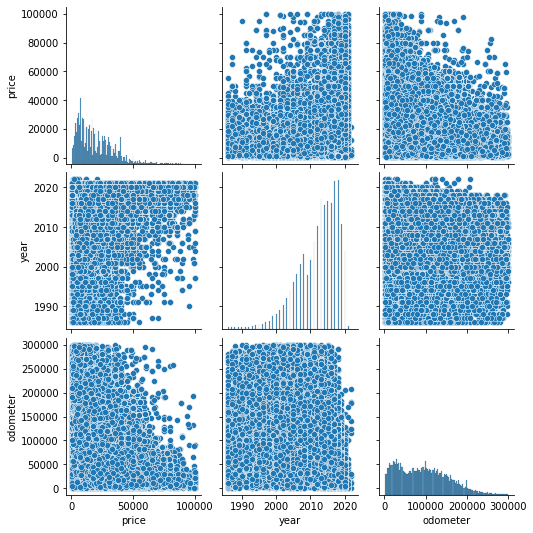

In [176]:
sns.pairplot(df1)

In [177]:
df1.set_index(['price', 'year']).sample(5)

region manufacturer  \
price year                                  
10250 1994.0         madison    chevrolet   
44999 2017.0       wenatchee       nissan   
17917 2016.0         orlando       subaru   
1000  2006.0  seattle-tacoma      hyundai   
14860 2015.0           tulsa       nissan   

                                                          model  condition  \
price year                                                                   
10250 1994.0                                         crv lx awd       good   
44999 2017.0                             titan platinum 4x4 gas   like new   
17917 2016.0                                            outback  excellent   
1000  2006.0                                             sonata    salvage   
14860 2015.0  frontier sv 85k ml.1owner well maint clean car...  excellent   

                cylinders fuel  odometer title_status transmission drive  \
price year                                                                 
10250 1994.0  8 cylinders  gas   95444.0        clean    automatic   rwd   
44999 2017.0  8 cylinders  gas   29656.0        clean    automatic   4wd   
17917 2016.0  4 cylinders  gas   91563.0        clean    automatic   4wd   
1000  2006.0  4 cylinders  gas  149000.0        clean    automatic   4wd   
14860 2015.0  4 cylinders  gas   85600.0        clean       manual   rwd   

                     size    type paint_color state  
price year                                           
10250 1994.0  sub-compact   coupe       white    wi  
44999 2017.0      compact   truck       white    wa  
17917 2016.0     mid-size   wagon       green    fl  
1000  2006.0    full-size     SUV        grey    wa  
14860 2015.0    full-size  pickup       white    ok

In [178]:
df1.sort_values('year').sample(10)

region  price    year manufacturer  \
75333        colorado springs  28988  2020.0       subaru   
908                birmingham  59950  2019.0         ford   
266797                buffalo   8750  2015.0       nissan   
215972  minneapolis / st paul  46999  2019.0    chevrolet   
26628         fresno / madera  22990  2017.0         ford   
305533          oklahoma city   2000  2008.0    chevrolet   
369157    dallas / fort worth  23929  2015.0         audi   
129091                 hawaii  21995  2018.0        honda   
31764           inland empire   8500  2007.0       toyota   
383667        tyler / east TX   5950  2007.0        acura   

                              model  condition    cylinders    fuel  odometer  \
75333                        legacy   like new  8 cylinders   other    3029.0   
908     f550 super duty rollback/wr  excellent  4 cylinders     gas   88140.0   
266797                       altima   like new  6 cylinders     gas  130000.0   
215972                silverado ltz  excellent  8 cylinders     gas   43277.0   
26628         transit connect cargo  excellent  4 cylinders     gas   40602.0   
305533                    avalanche       fair  8 cylinders     gas  184000.0   
369157                           q7   like new  6 cylinders     gas   70876.0   
129091        civic sport hatchback   like new  4 cylinders     gas   25938.0   
31764                         prius  excellent  4 cylinders  hybrid   60000.0   
383667                          mdx       fair  6 cylinders     gas  232000.0   

       title_status transmission drive       size       type paint_color state  
75333         clean        other   4wd   mid-size        SUV       white    co  
908           clean    automatic   4wd   mid-size     pickup      silver    al  
266797        clean    automatic   4wd  full-size      sedan      silver    ny  
215972        clean    automatic   4wd  full-size      truck        grey    mn  
26628         clean    automatic   fwd   mid-size      sedan       white    ca  
305533        clean    automatic   4wd   mid-size     pickup       white    ok  
369157        clean    automatic   4wd   mid-size        SUV       black    tx  
129091        clean    automatic   4wd    compact      coupe        blue    hi  
31764         clean    automatic   fwd  full-size  hatchback       white    ca  
383667        clean    automatic   4wd  full-size        SUV       black    tx

In [179]:
df1.drive.value_counts()

4wd    155813
fwd    134565
rwd     69032
Name: drive, dtype: int64

In [180]:
list(df1)

['region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [183]:
df1.to_csv('cars_cleaned.csv', index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

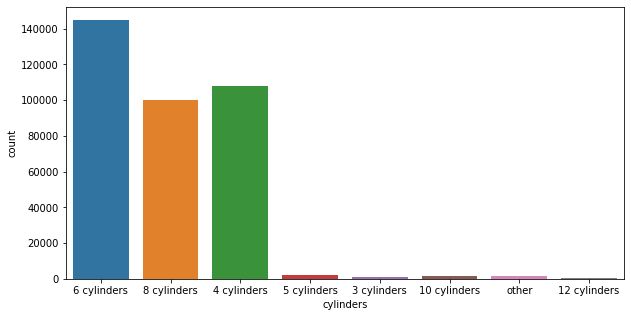

In [184]:
plt.figure(figsize=(10,5))
sns.countplot(df1['cylinders'])
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


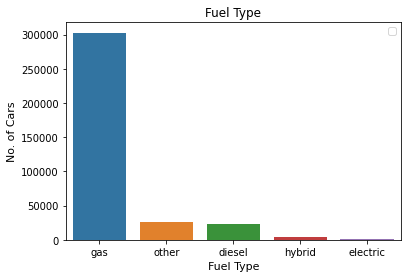

In [185]:
graph = sns.countplot(df1['fuel'])
graph.set_xlabel('Fuel Type',size=11)
graph.set_ylabel('No. of Cars',size=11)
plt.title('Fuel Type')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


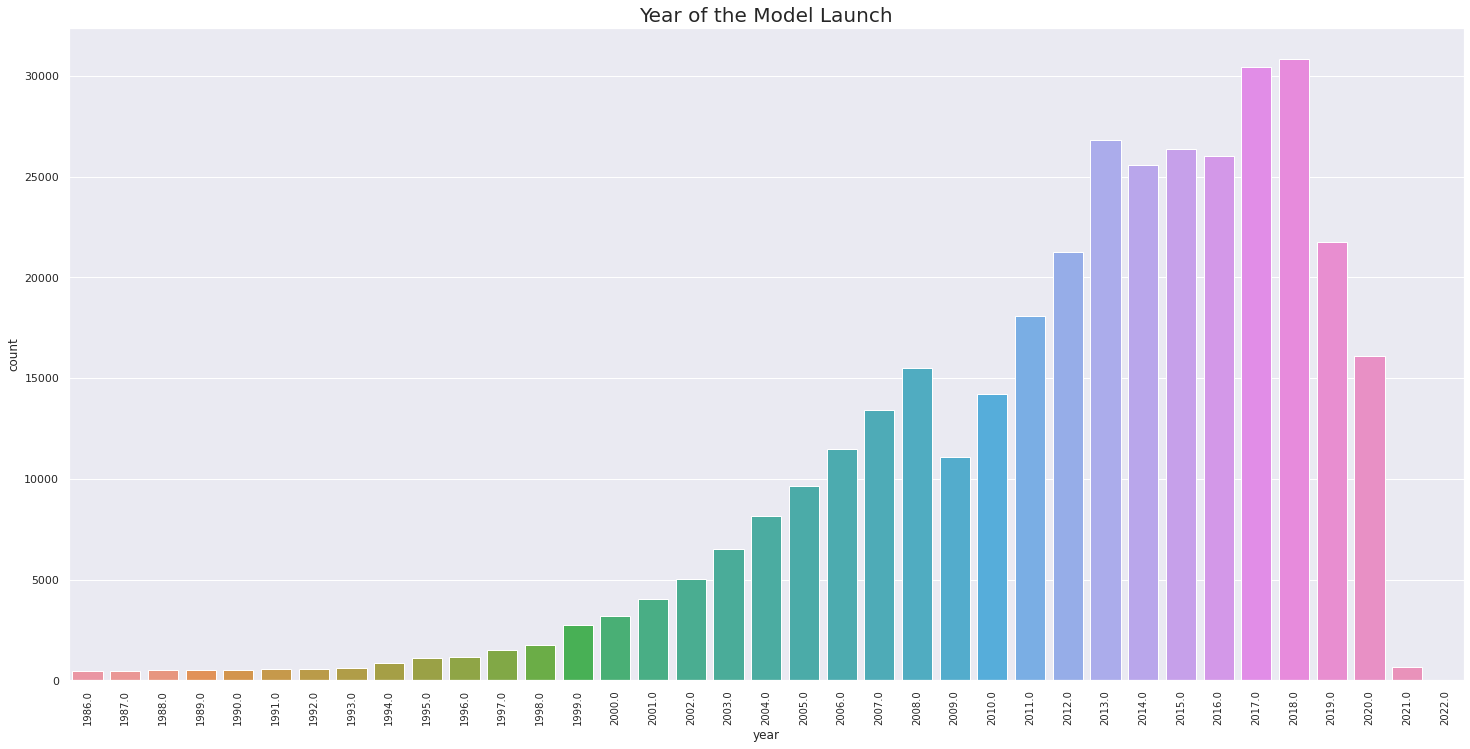

In [187]:
plt.figure(figsize=(25,12))
sns.set(style='darkgrid')
ax = sns.countplot(df1['year'])
plt.title("Year of the Model Launch", size=20)
k = ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=10)


In [188]:
manufec_count = df1['manufacturer'].value_counts().sort_values(ascending=False).reset_index()
manufec_count.columns = ['manufacturer','count']
manufec_count.head(10)

manufacturer  count
0         ford  61389
1    chevrolet  46202
2       toyota  30632
3        honda  19351
4       nissan  16798
5         jeep  16264
6          ram  15879
7          gmc  14904
8          bmw  13501
9        dodge  11158

In [189]:
mcount = df1[['manufacturer','transmission','year']].groupby(['transmission','year']).agg(['count'])
mcount.head(10)

manufacturer
                           count
transmission year               
automatic    1986.0          292
             1987.0          292
             1988.0          333
             1989.0          342
             1990.0          342
             1991.0          344
             1992.0          376
             1993.0          426
             1994.0          610
             1995.0          828

In [190]:
import plotly.graph_objects as go
plt.figure(figsize=(27,16))
trace0 = go.Bar(x = manufec_count['manufacturer'],
                y = manufec_count['count'],
                marker = dict(color = '#FF00FF'),
                text = manufec_count['count']
)
trace1 = go.Bar(x =manufec_count['manufacturer'],
               y = df1
               ['transmission'],
               marker = dict(color = '#00008B')
               )

layout = go.Layout(title = 'Manufacturer')
fig = go.Figure(data = [trace0,trace1],layout = layout)
fig.show()

<Figure size 1944x1152 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



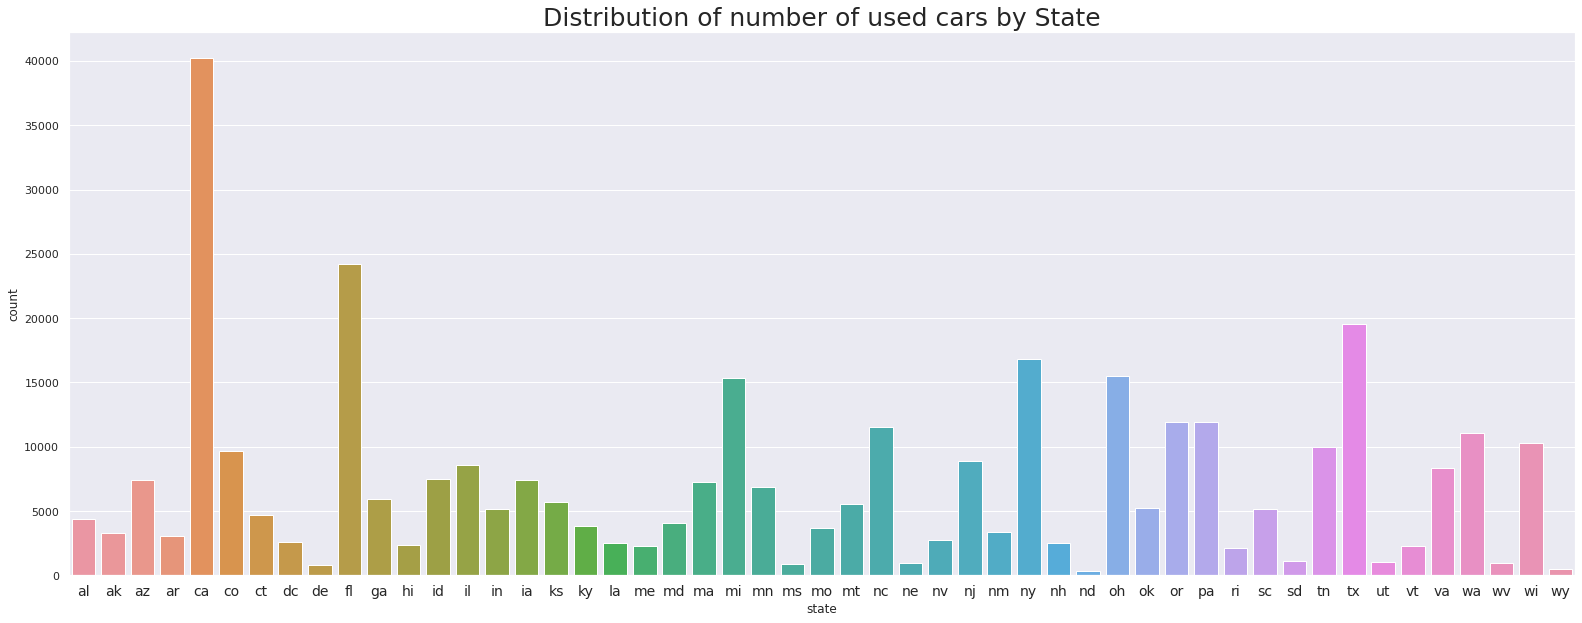

In [191]:
plt.figure(figsize=(27,10))
ax = sns.countplot(df1['state'])
plt.title("Distribution of number of used cars by State", size=25)
k = ax.set_xticklabels(ax.get_xticklabels(),size=14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



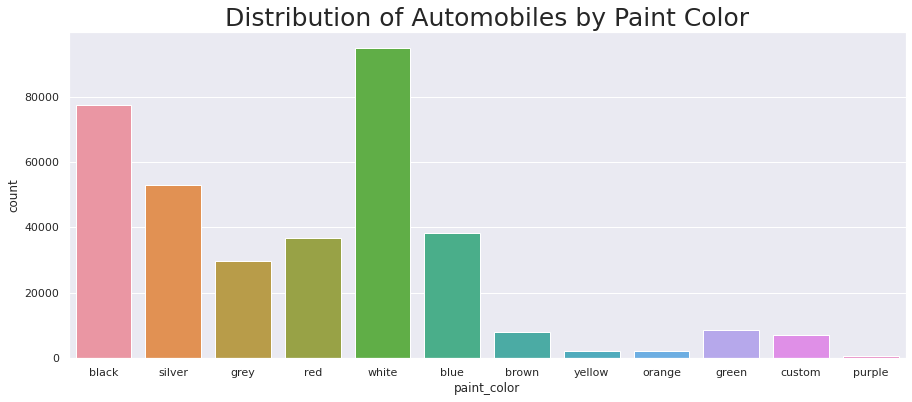

In [192]:
plt.figure(figsize=(15,6))
color_labels = list(df1['paint_color'].unique())
plt.title("Distribution of Automobiles by Paint Color", size=25)
rgb_values = sns.color_palette('Set1',6)
color_map = dict(zip(color_labels,rgb_values))
ax = sns.countplot(df1['paint_color'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



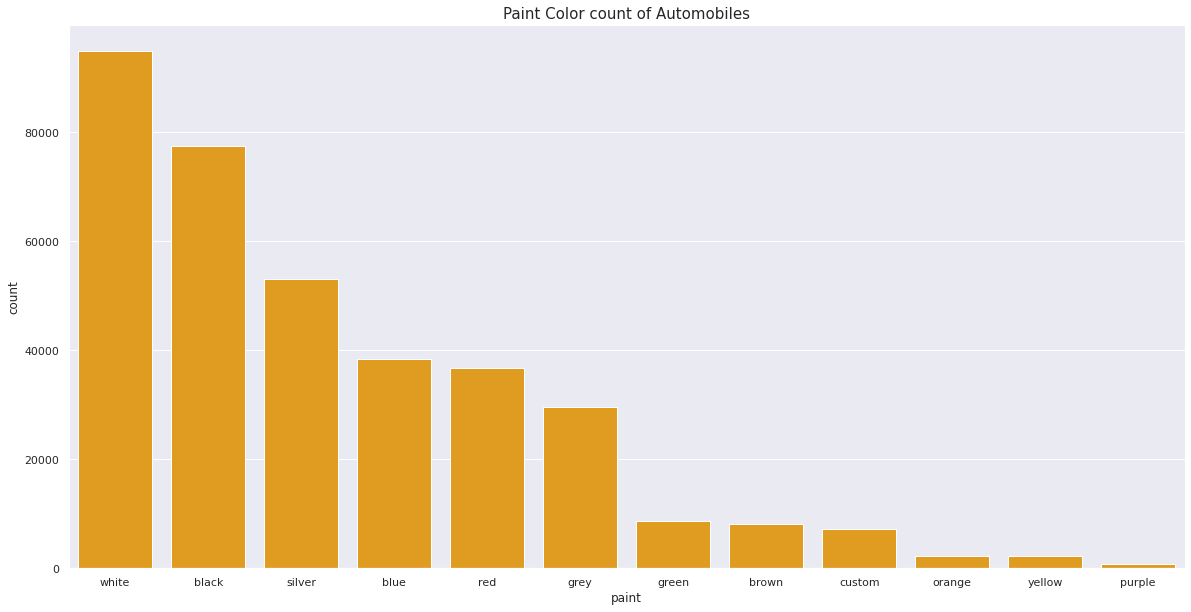

In [193]:
plt.figure(figsize=(20,10))
paint = df1['paint_color'].value_counts().reset_index()
paint.columns = ['paint','count']

plt.title("Paint Color count of Automobiles",size=15)
sns.barplot(paint['paint'],paint['count'],color = 'orange')

In [194]:
transm = df1.groupby('manufacturer')['transmission'].value_counts()

In [195]:
trans = pd.DataFrame(transm)
trans = trans.unstack(level= 'transmission')
trans.head(5)

transmission               
transmission    automatic manual   other
manufacturer                            
acura              3177.0   95.0  2444.0
alfa-romeo          148.0   14.0   704.0
aston-martin         18.0    NaN     1.0
audi               4491.0  260.0  2380.0
bmw               10054.0  673.0  2774.0

In [196]:
trans.index

Index(['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ferrari', 'fiat', 'ford',
       'gmc', 'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar',
       'jeep', 'kia', 'land rover', 'lexus', 'lincoln', 'mazda',
       'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'morgan', 'nissan',
       'pontiac', 'porsche', 'ram', 'rover', 'saturn', 'subaru', 'tesla',
       'toyota', 'volkswagen', 'volvo'],
      dtype='object', name='manufacturer')

In [197]:
trans.dtypes

              transmission
transmission  automatic       float64
              manual          float64
              other           float64
dtype: object

In [198]:
trans.columns = ['automatic','manual','other']

In [201]:
plt.figure(figsize=(20,10))
trace0 = go.Bar(y = trans['automatic'],
               x = trans.index,
               marker={'color' : '#FFB300'},
                text = trans['automatic'],
                textposition='auto',
                name = 'Automatic'
               )
trace1 = go.Bar(y = trans['manual'],
               x = trans.index,
               marker= dict (color ='#FF6F00'),
                text = trans['manual'],
                textposition='auto',
                name = 'Manual'
               ) 
trace2 = go.Bar(y = trans['other'],
               x = trans.index,
               marker={'color' : '#1E88E5'},
                text = trans['other'],
                textposition='auto',
                name = 'Others'
               ) 
layout = go.Layout(hovermode = 'x',
                   title = 'Transmission',
                   barmode = 'stack',
                   xaxis = dict(title = 'Manufacturer'),
                   yaxis = dict(title = 'Count')
                  )
data = [trace0,trace1,trace2]
fig = go.Figure(data = data,layout=layout)
fig.show()

<Figure size 1440x720 with 0 Axes>

# Paint Color

In [203]:
paintcolor = df1.groupby('manufacturer')['paint_color'].value_counts()
paintcolor

manufacturer  paint_color
acura         white          1659
              black          1288
              silver         1143
              blue            485
              grey            438
                             ... 
volvo         custom           82
              green            66
              yellow           11
              orange           10
              purple            3
Name: paint_color, Length: 462, dtype: int64

In [204]:
paintcolor = paintcolor.unstack(level='paint_color')
paintcolor.head(10)

paint_color    black    blue   brown  custom  green    grey  orange  purple  \
manufacturer                                                                  
acura         1288.0   485.0   114.0    77.0   83.0   438.0    12.0     5.0   
alfa-romeo     261.0   193.0    13.0     4.0   13.0    20.0     3.0     NaN   
aston-martin     3.0     4.0     NaN     1.0    3.0     2.0     NaN     NaN   
audi          2279.0   942.0   101.0    73.0  101.0   652.0    18.0     5.0   
bmw           4281.0  1699.0   191.0   212.0  168.0  1160.0    54.0    17.0   
buick          941.0   444.0   251.0   136.0   75.0   311.0    16.0    18.0   
cadillac      1886.0   474.0   146.0   151.0   73.0   328.0    26.0    15.0   
chevrolet     9248.0  4528.0  1175.0   853.0  932.0  3168.0   269.0    87.0   
chrysler      1145.0   661.0   128.0   136.0  114.0   499.0    18.0    17.0   
dodge         2693.0  1178.0   151.0   205.0  383.0  1046.0   190.0    68.0   

paint_color      red  silver    white  yellow  
manufacturer                                   
acura          400.0  1143.0   1659.0    12.0  
alfa-romeo     103.0    62.0    194.0     NaN  
aston-martin     3.0     2.0      1.0     NaN  
audi           398.0  1179.0   1353.0    30.0  
bmw            728.0  1848.0   3095.0    48.0  
buick          649.0   781.0   1283.0    10.0  
cadillac       584.0   879.0   1632.0    24.0  
chevrolet     5961.0  6181.0  13299.0   501.0  
chrysler       510.0   969.0   1149.0    29.0  
dodge         1303.0  1429.0   2440.0    72.0

In [205]:
plt.figure(figsize=(20,10))
trace = []
colorname = list(paintcolor.columns)
colorcode = ['#000000','#0000FF','#800000','#008080','#00FF00','#808080','#FFA500','#800080','#FF0000','#C0C0C0','#FFFFFF','#FFFF00']
for i in range(len(colorname)):
    
    tr = go.Bar(x = paintcolor.index,
                   y = paintcolor[colorname[i]],
                   marker = dict(color = colorcode[i]),
                   text = paintcolor[colorname[i]],
                   textposition = 'auto',
                   name = colorname[i])
    trace.append([tr])

layout = go.Layout(hovermode = 'x',
                   title = "Automobile Paint Color  ",
                   barmode = 'stack',
                   xaxis = dict(title = 'Manufacturer'),
                   yaxis = dict(title = 'Count')
                  )

data = [trace[0][0],trace[1][0],trace[2][0],trace[3][0],trace[4][0],trace[5][0],trace[6][0],trace[7][0],trace[8][0],trace[9][0],trace[10][0],
       trace[11][0]]
fig = go.Figure(data = data,layout = layout)
fig.show()

<Figure size 1440x720 with 0 Axes>

In [212]:
statewise = df1.groupby('manufacturer')['state'].value_counts()
statewise

manufacturer  state
acura         ca       691
              fl       337
              oh       302
              ny       281
              tx       281
                      ... 
volvo         ms         2
              ne         2
              ut         2
              wy         2
              nd         1
Name: state, Length: 1877, dtype: int64

In [213]:
statewise = statewise.unstack(level='state')

In [209]:
statewise.head(10)

state            ak     al     ar      az      ca      co     ct     dc  \
manufacturer                                                              
acura          19.0  145.0   60.0   114.0   691.0   141.0   84.0   56.0   
alfa-romeo      2.0   31.0   10.0    21.0   110.0    23.0    9.0    5.0   
aston-martin    NaN    NaN    NaN     NaN     1.0     1.0    1.0    NaN   
audi           37.0   81.0   53.0   132.0   850.0   209.0  145.0   74.0   
bmw           118.0  124.0   81.0   249.0  1931.0   311.0  174.0  161.0   
buick          33.0   69.0   42.0   108.0   282.0   116.0   61.0   26.0   
cadillac       31.0   87.0   56.0   156.0   594.0   121.0   75.0   43.0   
chevrolet     523.0  543.0  539.0  1000.0  4340.0  1035.0  483.0  199.0   
chrysler       50.0   60.0   65.0   119.0   422.0   104.0   47.0   42.0   
dodge         170.0  108.0  125.0   220.0  1024.0   233.0  123.0   48.0   

state            de      fl  ...     sd      tn      tx     ut     va     vt  \
manufacturer                 ...                                               
acura          25.0   337.0  ...    2.0   178.0   281.0    7.0  188.0   15.0   
alfa-romeo      5.0    43.0  ...    NaN    23.0    57.0    NaN   34.0    NaN   
aston-martin    NaN     6.0  ...    NaN     NaN     NaN    NaN    NaN    NaN   
audi           16.0   460.0  ...    5.0   169.0   334.0    8.0  171.0   41.0   
bmw            25.0  1193.0  ...   31.0   265.0   655.0   16.0  342.0   68.0   
buick           9.0   211.0  ...   22.0   160.0   213.0    9.0  118.0    8.0   
cadillac       10.0   596.0  ...    6.0   176.0   316.0   10.0  180.0   16.0   
chevrolet     139.0  2604.0  ...  212.0  1149.0  2638.0  124.0  964.0  223.0   
chrysler       11.0   402.0  ...   32.0   147.0   224.0   21.0   93.0   16.0   
dodge          22.0   882.0  ...   34.0   278.0   663.0   41.0  209.0   29.0   

state             wa      wi     wv    wy  
manufacturer                               
acura          106.0   124.0   33.0   5.0  
alfa-romeo       4.0    24.0    7.0   9.0  
aston-martin     5.0     NaN    NaN   NaN  
audi           185.0   237.0   19.0   8.0  
bmw            451.0   555.0   53.0  15.0  
buick           60.0   194.0   13.0   3.0  
cadillac       114.0   205.0    9.0   9.0  
chevrolet     1200.0  1669.0  142.0  66.0  
chrysler       109.0   167.0    3.0   8.0  
dodge          399.0   367.0   19.0  13.0  

[10 rows x 51 columns]

In [214]:
statewise.describe()

state          ak          al          ar           az         ca  \
count   37.000000   37.000000   37.000000    37.000000    40.0000   
mean    88.243243  118.594595   81.729730   199.729730  1006.6000   
std    127.185867  166.060474  117.335618   257.736046  1317.9599   
min      2.000000    2.000000    1.000000     2.000000     1.0000   
25%     11.000000   31.000000   11.000000    49.000000   162.2500   
50%     37.000000   70.000000   42.000000   119.000000   563.0000   
75%    127.000000  124.000000   81.000000   220.000000  1227.7500   
max    553.000000  857.000000  539.000000  1176.000000  5849.0000   

state           co          ct          dc          de           fl  ...  \
count    38.000000   39.000000   38.000000   34.000000    39.000000  ...   
mean    255.421053  121.051282   67.842105   24.676471   620.974359  ...   
std     330.097826  144.527533   75.586902   34.437225   835.708854  ...   
min       1.000000    1.000000    1.000000    1.000000     3.000000  ...   
25%      46.000000   23.500000   16.500000    8.250000   113.000000  ...   
50%     122.500000   75.000000   47.000000   12.000000   337.000000  ...   
75%     294.250000  141.000000   79.250000   25.000000   801.500000  ...   
max    1520.000000  652.000000  289.000000  159.000000  4364.000000  ...   

state          sd           tn           tx          ut           va  \
count   34.000000    37.000000    38.000000   36.000000    38.000000   
mean    33.088235   268.918919   513.684211   29.138889   218.947368   
std     60.327072   371.541786   761.331590   47.632014   285.484316   
min      1.000000     1.000000     1.000000    2.000000     1.000000   
25%      5.000000    57.000000   104.500000    4.000000    41.250000   
50%      8.500000   169.000000   252.500000    9.500000   138.000000   
75%     31.750000   278.000000   629.000000   26.500000   264.250000   
max    280.000000  1924.000000  3891.000000  245.000000  1362.000000   

state          vt           wa           wi          wv          wy  
count   34.000000    39.000000    38.000000   33.000000   31.000000  
mean    66.558824   282.974359   271.394737   28.696970   16.903226  
std     87.557839   414.955006   382.926959   43.511841   24.454522  
min      1.000000     1.000000     1.000000    1.000000    1.000000  
25%     12.750000    37.000000    60.000000    9.000000    4.000000  
50%     28.000000   109.000000   155.500000   14.000000    9.000000  
75%     76.250000   402.000000   342.000000   20.000000   16.000000  
max    358.000000  1948.000000  1753.000000  218.000000  122.000000  

[8 rows x 51 columns]

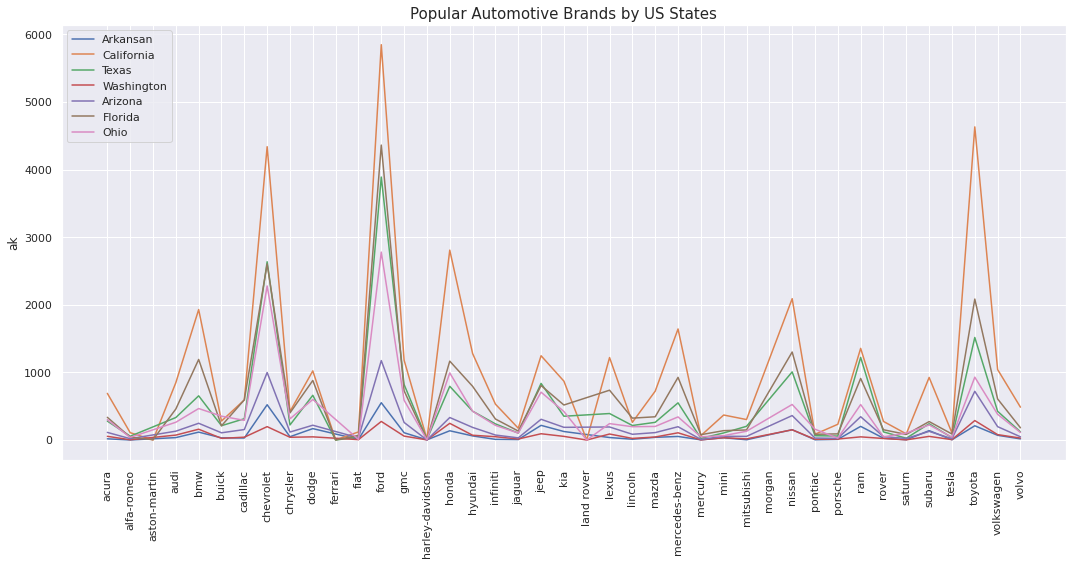

In [215]:
plt.figure(figsize = (18,8))
brand = list(statewise.index)
sns.lineplot(x = brand,y = statewise['ak'],label = 'Arkansan')
sns.lineplot(x = brand,y = statewise['ca'],label = 'California')
#sns.lineplot(x = brand,y = statewise['ny'],label = 'New York')
sns.lineplot(x = brand,y = statewise['tx'],label = 'Texas')
sns.lineplot(x = brand,y = statewise['dc'],label = 'Washington')
sns.lineplot(x = brand,y = statewise['az'],label = 'Arizona')
sns.lineplot(x = brand,y = statewise['fl'],label = 'Florida')
sns.lineplot(x = brand,y = statewise['oh'],label = 'Ohio')
plt.title("Popular Automotive Brands by US States",size=15)
plt.xticks(label = 'Brand Name', rotation=90)
plt.yticks(label = 'No. of cars')
plt.legend()
plt.show()

In [216]:
px.line(x = statewise.index,y = statewise['ca'])